In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [129]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'  # Mac인 경우
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows인 경우
# plt.rcParams['font.family'] = 'NanumGothic'  # 설치되어 있으면 리눅스에서도 가능
plt.rcParams['axes.unicode_minus'] = False

In [130]:
# load final_df

final_df = pd.read_csv("merged4_df.csv")
final_df.head()

,id,max_corsi,corsi_minmax,conditional_correct,conditional_minmax,mental_accuracy,mental_minmax,spatial_arrag_correct,spatial_arrag_minmax,spatial_rel_correct,...,nvc_count_maxscaled,crt_correct,crt_minmax,NFC,NFC_minmax,verbal,verbal_minmax,wason_correct,wason_minmax,jacc
0,participant_1,7,0.666667,0.500,0.500,0.45,0.45,0.55,0.55,0.40625,...,0.00000,0.285714,0.285714,3.75,0.458333,0.250,0.250,0.333333,0.333333,0.333333
1,participant_10,7,0.666667,0.500,0.500,0.45,0.45,0.70,0.70,0.40625,...,0.15625,0.571429,0.571429,3.50,0.416667,0.375,0.375,0.500000,0.500000,0.136719
2,participant_100,7,0.666667,0.500,0.500,0.00,0.00,0.60,0.60,0.40625,...,0.00000,0.571429,0.571429,3.75,0.458333,0.000,0.000,0.500000,0.500000,0.269531
3,participant_101,6,0.555556,0.375,0.375,0.15,0.15,0.70,0.70,0.46875,...,0.09375,0.714286,0.714286,5.00,0.666667,0.500,0.500,1.000000,1.000000,0.260417
4,participant_102,7,0.666667,0.500,0.500,0.10,0.10,0.80,0.80,0.31250,...,0.00000,0.571429,0.571429,3.50,0.416667,0.125,0.125,0.000000,0.000000,0.252604


In [131]:
def assign_range_clusters(final_df, score_col='jacc', k_list=[2, 3, 4, 5]):
    scores = final_df[score_col].values
    min_val, max_val = scores.min(), scores.max()

    for k in k_list:
        bins = np.linspace(min_val, max_val, k + 1)
        cluster_labels = np.digitize(scores, bins[1:], right=True)
        col_name = f'Range_k{k}'
        final_df[col_name] = cluster_labels  

    return final_df

def assign_jaccard_clusters(df, target_col='jacc', cluster_counts=[2, 3, 4, 5]):
    for k in cluster_counts:
        cluster_col_name = f'Cluster_jacc_{k}'
        df[cluster_col_name] = pd.qcut(df[target_col], q=k, labels=False, duplicates='drop')
    return df


final_df = assign_jaccard_clusters(final_df)

In [132]:
# 클러스터링을 실제로 수행
final_df = assign_range_clusters(final_df, score_col='jacc', k_list=[2, 3, 4, 5])
final_df.head()

,id,max_corsi,corsi_minmax,conditional_correct,conditional_minmax,mental_accuracy,mental_minmax,spatial_arrag_correct,spatial_arrag_minmax,spatial_rel_correct,...,wason_minmax,jacc,Cluster_jacc_2,Cluster_jacc_3,Cluster_jacc_4,Cluster_jacc_5,Range_k2,Range_k3,Range_k4,Range_k5
0,participant_1,7,0.666667,0.500,0.500,0.45,0.45,0.55,0.55,0.40625,...,0.333333,0.333333,1,1,2,3,0,1,1,1
1,participant_10,7,0.666667,0.500,0.500,0.45,0.45,0.70,0.70,0.40625,...,0.500000,0.136719,0,0,0,0,0,0,0,0
2,participant_100,7,0.666667,0.500,0.500,0.00,0.00,0.60,0.60,0.40625,...,0.500000,0.269531,0,1,1,2,0,0,1,1
3,participant_101,6,0.555556,0.375,0.375,0.15,0.15,0.70,0.70,0.46875,...,1.000000,0.260417,0,1,1,2,0,0,1,1
4,participant_102,7,0.666667,0.500,0.500,0.10,0.10,0.80,0.80,0.31250,...,0.000000,0.252604,0,1,1,2,0,0,1,1


In [133]:
#global baseline (cluster 1)

global_baseline = final_df['jacc'].mean()
print("global_baseline: ")
print(global_baseline)
print("")

#cluster 2
Range_cluter2_baseline = final_df.groupby('Range_k2')['jacc'].mean().reset_index()
print("Cluster2_baseline: ")
print(Range_cluter2_baseline)
print("")



#cluster 3
Range_cluter3_baseline = final_df.groupby('Range_k3')['jacc'].mean().reset_index()
print("Cluster3_baseline: ")
print(Range_cluter3_baseline)
print("")

#cluster 4

Range_cluter4_baseline = final_df.groupby('Range_k4')['jacc'].mean().reset_index()
print("Cluster4_baseline: ")
print(Range_cluter4_baseline)
print("")


#cluster 5

Range_cluter5_baseline = final_df.groupby('Range_k5')['jacc'].mean().reset_index()
print("Range_Cluster5_baseline: ")
print(Range_cluter5_baseline)

global_baseline: 
0.3141776315789474

Cluster2_baseline: 
   Range_k2      jacc
0         0  0.222355
1         1  0.571281

Cluster3_baseline: 
   Range_k3      jacc
0         0  0.174627
1         1  0.397656
2         2  0.627257

Cluster4_baseline: 
   Range_k4      jacc
0         0  0.141329
1         1  0.313202
2         2  0.513507
3         3  0.657943

Range_Cluster5_baseline: 
   Range_k5      jacc
0         0  0.122656
1         1  0.266969
2         2  0.395908
3         3  0.547786
4         4  0.686012


In [134]:

global_std = final_df['jacc'].std()


print("Standard deviation:", global_std)

jacc_min = final_df["jacc"].min()
jacc_max = final_df["jacc"].max()

print(jacc_min)
print(jacc_max)


#cluster 2
quantile_cluter2_baseline = final_df.groupby('Cluster_jacc_2')['jacc'].mean().reset_index()
print("quantile_baseline: ")
print(quantile_cluter2_baseline)
print("")

Standard deviation: 0.18176360047011458
0.0572916666666666
0.7630208333333334
quantile_baseline: 
   Cluster_jacc_2      jacc
0               0  0.167996
1               1  0.463470



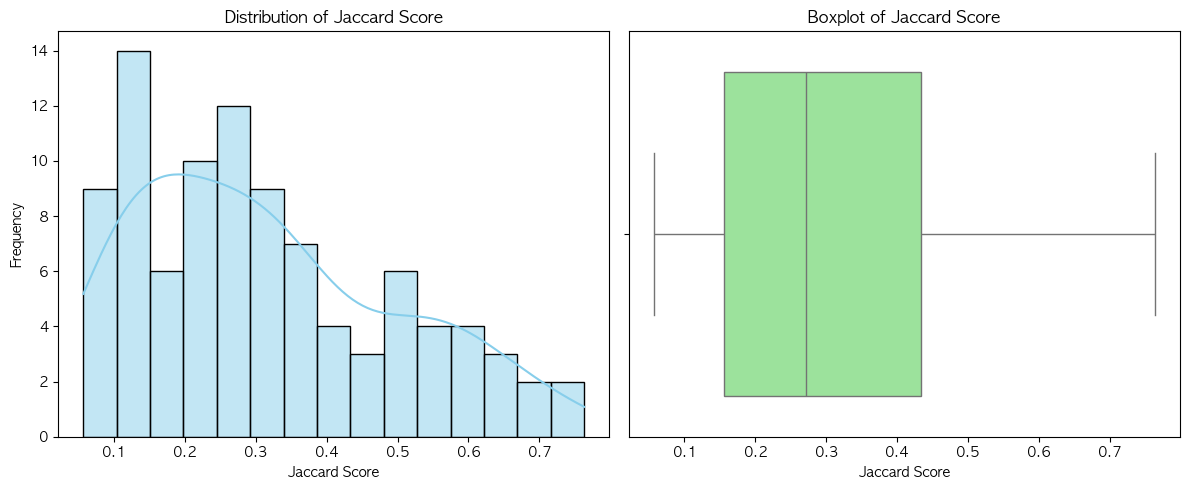

In [135]:
target_col = 'jacc'

plt.figure(figsize=(12, 5))

# 1. 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(final_df[target_col], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Jaccard Score')
plt.xlabel('Jaccard Score')
plt.ylabel('Frequency')

# 2. 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=final_df[target_col], color='lightgreen')
plt.title('Boxplot of Jaccard Score')
plt.xlabel('Jaccard Score')

plt.tight_layout()
plt.show()

In [136]:
rohwert_cols = [
    "conditional_correct", "wason_correct", "nvc_count", 
    "spatial_rel_correct", "spatial_arrag_correct", "crt_correct", 
    "NFC", "max_corsi", "mental_accuracy", "verbal", "jacc"
]

# 기술통계 출력
descriptive_stats = final_df[rohwert_cols].agg(['mean', 'std', 'min', 'max']).T
descriptive_stats = descriptive_stats.round(3)

print(descriptive_stats)


                        mean    std    min     max
conditional_correct    0.558  0.162  0.000   1.000
wason_correct          0.402  0.215  0.000   1.000
nvc_count              3.884  4.760  0.000  32.000
spatial_rel_correct    0.556  0.177  0.250   1.000
spatial_arrag_correct  0.718  0.149  0.350   1.000
crt_correct            0.468  0.271  0.000   1.000
NFC                    3.818  0.774  2.000   6.000
max_corsi              7.379  1.248  2.000  10.000
mental_accuracy        0.352  0.234  0.000   0.950
verbal                 0.347  0.267  0.000   1.000
jacc                   0.314  0.182  0.057   0.763


In [137]:
# 전체 평균 baseline

overall_loocv_pred = final_df['jacc'].transform(lambda x: (x.sum() - x) / (len(x)-1))


# MAE (평균 절대 오차) 계산
overall_loocv_abs_error = np.abs(final_df['jacc'] - overall_loocv_pred)
overall_loocv_mae = overall_loocv_abs_error.mean()

print("MAE nach der LOOCV-Methode der Mittelwertbildung über alle Daten:")
print(overall_loocv_mae)
print('')

# mae pro Cluster : Baseline 

def compute_cluster_loocv_mae(df, cluster_col):
    errors = []
    for _, group in df.groupby(cluster_col):
        jacc_values = group['jacc'].values
        if len(jacc_values) <= 1:
            continue  
        for i in range(len(jacc_values)):
            loo_values = np.delete(jacc_values, i)
            pred = np.mean(loo_values)
            error = abs(jacc_values[i] - pred)
            errors.append(error)
    return np.mean(errors)

# range baseline
cluster_range_mae_2 = compute_cluster_loocv_mae(final_df, 'Range_k2')
cluster_range_mae_3 = compute_cluster_loocv_mae(final_df, 'Range_k3')
cluster_range_mae_4 = compute_cluster_loocv_mae(final_df, 'Range_k4')
cluster_range_mae_5 = compute_cluster_loocv_mae(final_df, 'Range_k5')


print("Durchschnitt mit 2 Range clustern (LOOCV) MAE:", cluster_range_mae_2)
print("Durchschnitt mit 3 Range clustern (LOOCV) MAE:", cluster_range_mae_3)
print("Durchschnitt mit 4 Range clustern (LOOCV) MAE:", cluster_range_mae_4)
print("Durchschnitt mit 5 Range clustern (LOOCV) MAE:", cluster_range_mae_5)

print('')
print('')

# quantile baseline
cluster_jaccard_mae_2 = compute_cluster_loocv_mae(final_df, 'Cluster_jacc_2')
cluster_jaccard_mae_3 = compute_cluster_loocv_mae(final_df, 'Cluster_jacc_3')
cluster_jaccard_mae_4 = compute_cluster_loocv_mae(final_df, 'Cluster_jacc_4')
cluster_jaccard_mae_5 = compute_cluster_loocv_mae(final_df, 'Cluster_jacc_5')


print("Durchschnitt mit 2 clustern (LOOCV) MAE:", cluster_jaccard_mae_2)
print("Durchschnitt mit 3 clustern (LOOCV) MAE:", cluster_jaccard_mae_3)
print("Durchschnitt mit 4 clustern (LOOCV) MAE:", cluster_jaccard_mae_4)
print("Durchschnitt mit 5 clustern (LOOCV) MAE:", cluster_jaccard_mae_5)

MAE nach der LOOCV-Methode der Mittelwertbildung über alle Daten:
0.15154581933557298

Durchschnitt mit 2 Range clustern (LOOCV) MAE: 0.08333809075451312
Durchschnitt mit 3 Range clustern (LOOCV) MAE: 0.06156059680451128
Durchschnitt mit 4 Range clustern (LOOCV) MAE: 0.04237216576597745
Durchschnitt mit 5 Range clustern (LOOCV) MAE: 0.034743833743011376


Durchschnitt mit 2 clustern (LOOCV) MAE: 0.08817451454144147
Durchschnitt mit 3 clustern (LOOCV) MAE: 0.05596238327674025
Durchschnitt mit 4 clustern (LOOCV) MAE: 0.03988638530615076
Durchschnitt mit 5 clustern (LOOCV) MAE: 0.03749136895062734


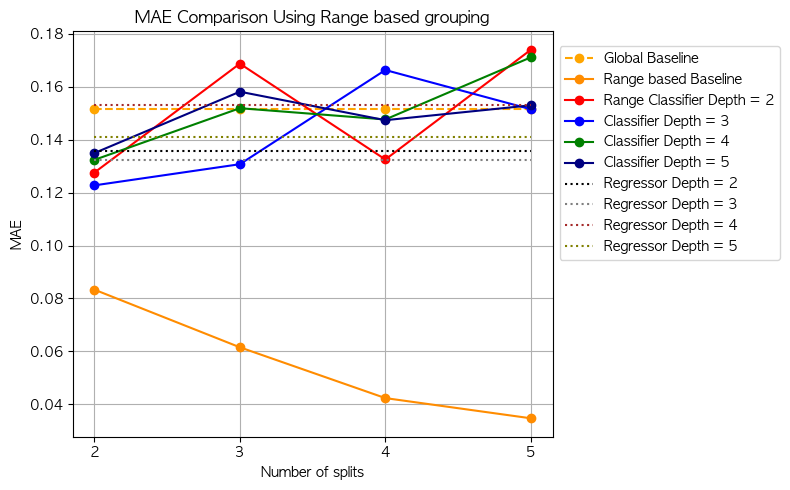

In [138]:
feature_cols = [
    'conditional_minmax', 'mental_minmax', 
    'spatial_arrag_minmax', 'spatial_rel_minmax', 'nvc_count_maxscaled', 
    'crt_minmax', 'NFC_minmax','corsi_minmax', 'verbal_minmax', 'wason_minmax'
]

# jaccard score clustering

def run_loocv_with_jacc_cluster_target(final_df, cluster_col="Range_k2", jacc_col="jacc", max_depth=2):
    errors = []
    X_full = final_df[feature_cols]
    y_clusters = final_df[cluster_col].values
    y_jacc = final_df[jacc_col].values
    loo = LeaveOneOut()

    for train_idx, test_idx in loo.split(X_full):
        X_train, X_test = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_train_clusters = y_clusters[train_idx]
        y_train_jacc = y_jacc[train_idx]
        true_jacc = y_jacc[test_idx[0]]

        
        tree = DecisionTreeClassifier(max_depth=max_depth, random_state=2)
        tree.fit(X_train, y_train_clusters)

        pred_cluster = tree.predict(X_test)[0]
        cluster_jaccs = y_train_jacc[y_train_clusters == pred_cluster] #

        if len(cluster_jaccs) == 0:
            continue  

        pred_jacc = cluster_jaccs.mean()
        errors.append(abs(pred_jacc - true_jacc))

    return np.mean(errors)


def run_loocv_regressor(final_df, jacc_col="jacc", max_depth=2):
    errors = []
    X_full = final_df[feature_cols]
    y_jacc = final_df[jacc_col].values
    loo = LeaveOneOut()

    for train_idx, test_idx in loo.split(X_full):
        X_train, X_test = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_train_jacc = y_jacc[train_idx]
        true_jacc = y_jacc[test_idx[0]]

        
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=2)
        tree.fit(X_train, y_train_jacc)

        pred_score = tree.predict(X_test)[0]
    
        errors.append(abs(pred_score - true_jacc))

    return np.mean(errors)



k_list = [2, 3, 4, 5]
depth_list = [2, 3, 4, 5]

cluster_range_mae = {
    k: run_loocv_with_jacc_cluster_target(final_df,
                                         cluster_col =f"Range_k{k}",
                                         jacc_col = "jacc",
                                         max_depth = 2
                                         )
    for k in k_list
}

mae_tree ={
    depth: [
        run_loocv_with_jacc_cluster_target(
        final_df,
        cluster_col = f"Range_k{k}",
        max_depth = depth
        )
        for k in k_list
    ]
    for depth in depth_list
} 


mae_regressor = {
    depth: run_loocv_regressor(
        final_df,
        jacc_col="jacc",
        max_depth=depth
    )
    for depth in depth_list
}


mae_jacc_tree = {
    depth: [
        run_loocv_with_jacc_cluster_target(
            final_df,
            cluster_col=f"Cluster_jacc_{k}",
            jacc_col="jacc",
            max_depth=depth
        )
        for k in k_list
    ]
    for depth in depth_list
}


cluster_jaccard_mae = {
    k: run_loocv_with_jacc_cluster_target(final_df,
                                         cluster_col =f"Cluster_jacc_{k}",
                                         jacc_col = "jacc",
                                         max_depth = 2
                                         )
    for k in k_list
}

#baseline mae 값들 
baseline = overall_loocv_mae
mae_cluster_list = [cluster_range_mae_2, cluster_range_mae_3,cluster_range_mae_4,cluster_range_mae_5]
mae_Quantile_list = [cluster_jaccard_mae_2, cluster_jaccard_mae_3, cluster_jaccard_mae_4, cluster_jaccard_mae_5]

# range group
mae_tree_d2 = mae_tree[2]
mae_tree_d3 = mae_tree[3]
mae_tree_d4 = mae_tree[4]
mae_tree_d5 = mae_tree[5]

# quantile 그룹 
mae_jacc_d2 = mae_jacc_tree[2]
mae_jacc_d3 = mae_jacc_tree[3]
mae_jacc_d4 = mae_jacc_tree[4]
mae_jacc_d5 = mae_jacc_tree[5]

# tree regressor
mae_reg_d2 = [mae_regressor[2]] * len(k_list)
mae_reg_d3 = [mae_regressor[3]] * len(k_list)
mae_reg_d4 = [mae_regressor[4]] * len(k_list)
mae_reg_d5 = [mae_regressor[5]] * len(k_list)


cluster_counts = [2, 3, 4, 5]
plt.figure(figsize=(8, 5))

plt.plot(cluster_counts, [baseline]*4,
         linestyle="--", color='orange', marker='o',
         label="Global Baseline")


plt.plot(cluster_counts, 
         mae_cluster_list, 
         label="Range based Baseline", color='darkorange', 
         marker='o')

plt.plot(cluster_counts, 
         mae_tree_d2, 
         label="Range Classifier Depth = 2", 
         color='red', 
         marker='o')

plt.plot(cluster_counts, 
         mae_tree_d3, 
         label="Classifier Depth = 3", 
         color='blue', marker='o')
plt.plot(cluster_counts, 
         mae_tree_d4, 
         label="Classifier Depth = 4", 
         color='green', marker='o')
plt.plot(cluster_counts, 
         mae_tree_d5, 
         label="Classifier Depth = 5", 
         color='navy', marker='o')
'''

# Jaccard Quantile 
plt.plot(cluster_counts, 
         mae_Quantile_list, 
         label="Quantile Baseline", color='lightsalmon', marker ='o') 

plt.plot(cluster_counts,
         mae_jacc_d2,
         label="Quantile based Classifier Depth = 2",
         color='pink', marker='s')


plt.plot(cluster_counts,
         mae_jacc_d3,
         label="Classifier Depth = 3",
         color='teal', marker='s')
plt.plot(cluster_counts,
         mae_jacc_d4,
         label="Classifier Depth = 4",
         color='magenta', marker='s')
plt.plot(cluster_counts,
         mae_jacc_d5,
         label="Classifier Depth = 5",
         color='cyan', marker='s')
'''


#Regressor 
plt.plot(cluster_counts,
         mae_reg_d2,
         label="Regressor Depth = 2",
         linestyle=":", color='black')

plt.plot(cluster_counts,
         mae_reg_d3,
         label="Regressor Depth = 3",
         linestyle=":", color='gray')
plt.plot(cluster_counts,
         mae_reg_d4,
         label="Regressor Depth = 4",
         linestyle=":", color='brown')
plt.plot(cluster_counts,
         mae_reg_d5,
         label="Regressor Depth = 5",
         linestyle=":", color='olive')




plt.xlabel("Number of splits")
plt.ylabel("MAE")
plt.title("MAE Comparison Using Range based grouping")
plt.xticks(cluster_counts)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.show()

In [139]:
mae_reg_d2


[0.13551047975171546,
 0.13551047975171546,
 0.13551047975171546,
 0.13551047975171546]

In [140]:
mae_reg_d3

[0.13226239142948834,
 0.13226239142948834,
 0.13226239142948834,
 0.13226239142948834]

In [141]:
mae_reg_d4

[0.15313494848729045,
 0.15313494848729045,
 0.15313494848729045,
 0.15313494848729045]

In [142]:
mae_reg_d5

[0.14086766313676405,
 0.14086766313676405,
 0.14086766313676405,
 0.14086766313676405]

In [143]:
print(mae_cluster_list)
print(mae_Quantile_list)

[0.08333809075451312, 0.06156059680451128, 0.04237216576597745, 0.034743833743011376]
[0.08817451454144147, 0.05596238327674025, 0.03988638530615076, 0.03749136895062734]


In [144]:
print(mae_tree_d2)
print(mae_jacc_d2)

[0.1275363781963968, 0.16868773235171264, 0.13248652036028682, 0.17392918312763922]
[0.12671753792792914, 0.1564571368093874, 0.14953587333937204, 0.1119273654714271]


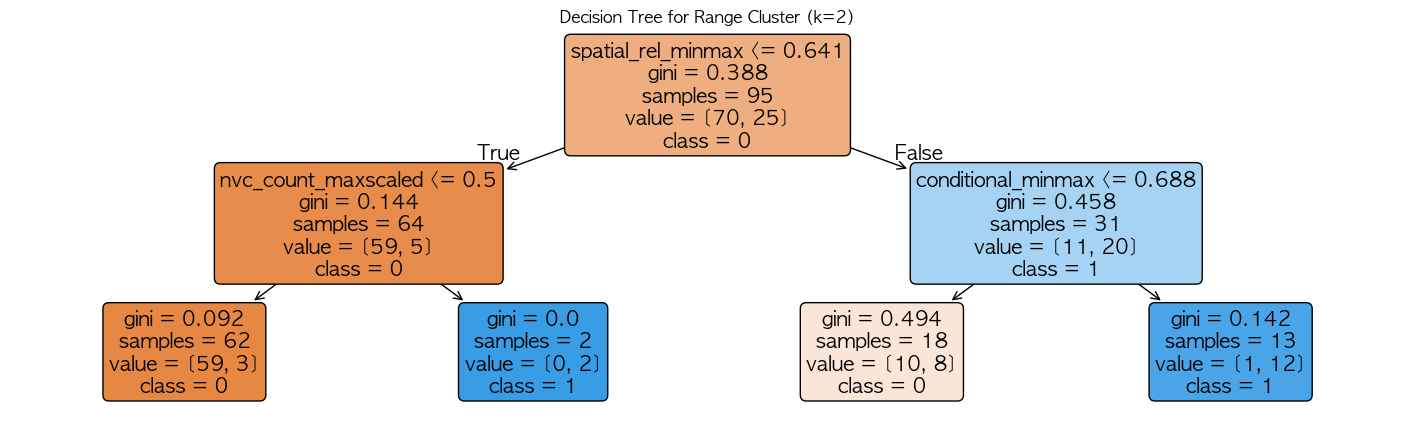

In [145]:
# Range Decision Tree Classifier depth 2 

feature_cols = [
    'conditional_minmax', 'mental_minmax', 
    'spatial_arrag_minmax', 'spatial_rel_minmax', 'nvc_count_maxscaled', 
    'crt_minmax', 'NFC_minmax','corsi_minmax', 'verbal_minmax', 'wason_minmax'
]

X = final_df[feature_cols]


for k in [2]:
    y = final_df[f'Range_k{k}']  

    
    tree = DecisionTreeClassifier(max_depth=2, random_state=2)
    tree.fit(X, y)

    plt.figure(figsize=(18, 5))
    plot_tree(tree, feature_names=feature_cols, class_names=[str(c) for c in sorted(y.unique())],
          filled=True,
          rounded=True)
    plt.title(f"Decision Tree for Range Cluster (k={k})")
    plt.show()


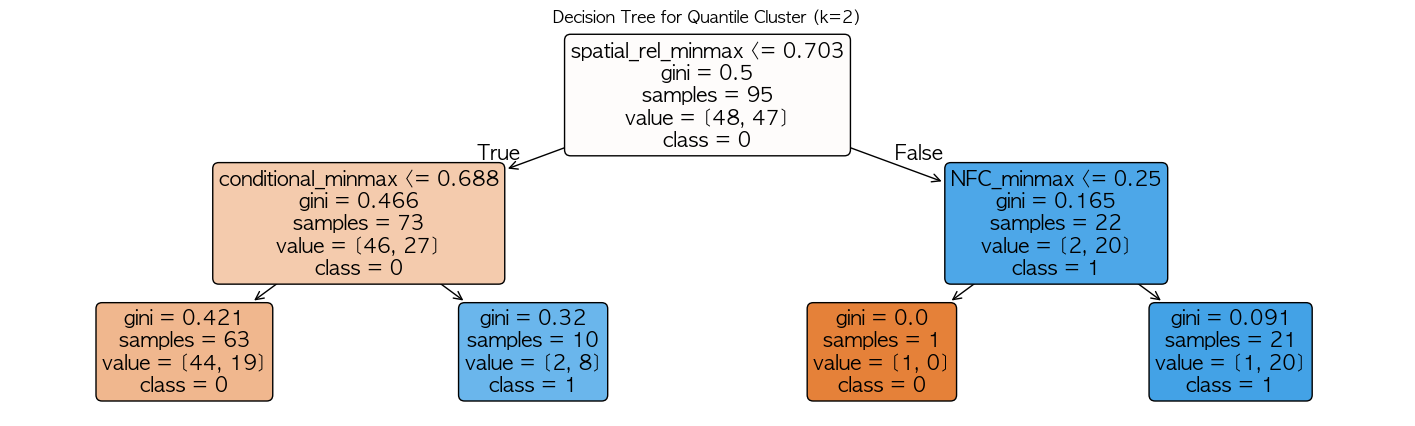

In [146]:
# quantile Decision Tree Classifier depth 2 


X = final_df[feature_cols]


for k in [2]:
    y = final_df[f'Cluster_jacc_{k}']  

    
    tree = DecisionTreeClassifier(max_depth=2, random_state=2)
    tree.fit(X, y)

    plt.figure(figsize=(18, 5))
    plot_tree(tree, feature_names=feature_cols, class_names=[str(c) for c in sorted(y.unique())],
          filled=True,
          rounded=True)
    plt.title(f"Decision Tree for Quantile Cluster (k={k})")
    plt.show()

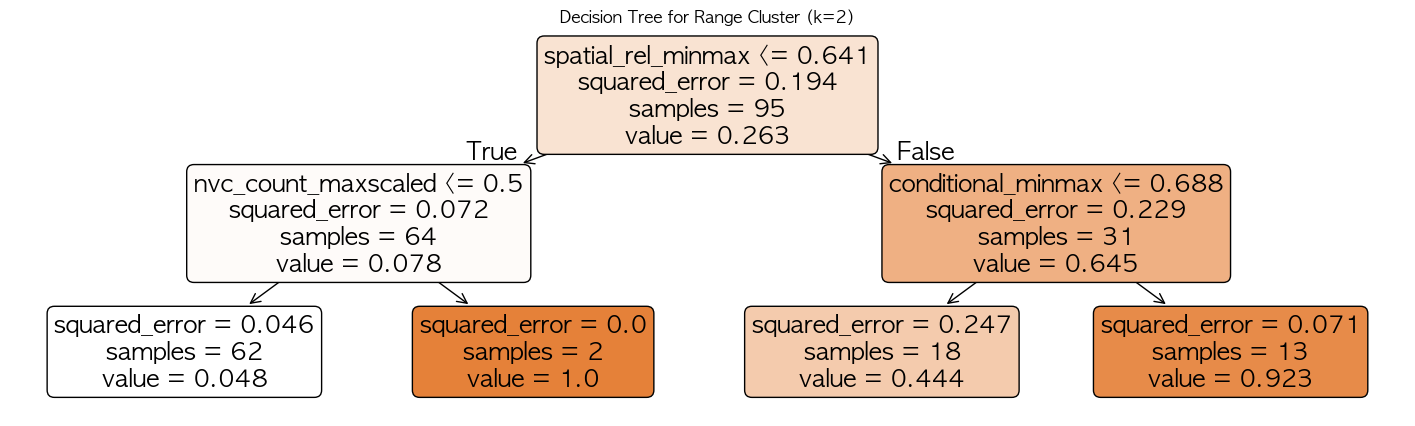

In [147]:
# Range Decision Tree Regressor depth 2 


X = final_df[feature_cols]


for k in [2]:
    y = final_df[f'Range_k{k}']  

    
    tree = DecisionTreeRegressor(max_depth=2, random_state=2)
    tree.fit(X, y)

    plt.figure(figsize=(18, 5))
    plot_tree(tree, feature_names=feature_cols, class_names=[str(c) for c in sorted(y.unique())],
          filled=True,
          rounded=True)
    plt.title(f"Decision Tree for Range Cluster (k={k})")
    plt.show()


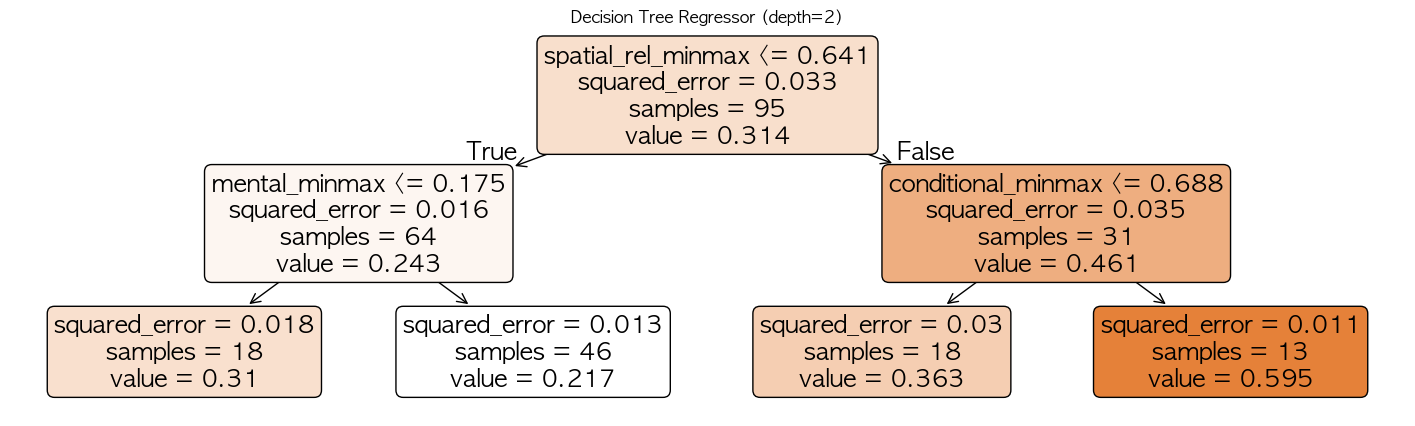

In [148]:
# Regression Tree (continuous target)
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

X = final_df[feature_cols]
y = final_df["jacc"]  # 연속형 타깃 (예: syllogism Jaccard 평균)

tree = DecisionTreeRegressor(max_depth=2, random_state=2, min_samples_leaf=5)
tree.fit(X, y)

plt.figure(figsize=(18,5))
plot_tree(tree, feature_names=feature_cols, filled=True, rounded=True)
plt.title("Decision Tree Regressor (depth=2)")
plt.show()

In [149]:
import pandas as pd

# 데이터 로딩 (두 개의 데이터프레임을 하나로 병합한다고 가정)
# df1: verbal, wason 등 포함 / df2: 나머지 표준화된 피처들 포함
# 두 데이터프레임에는 공통적으로 참가자 순서가 동일하다고 가정함

# 예: 데이터 로딩 및 병합 (id 없이 정렬된 상태일 경우)
# df1 = pd.read_csv("file1.csv")
# df2 = pd.read_csv("file2.csv")
# df = pd.concat([df1, df2], axis=1)

# 또는 id 기준 병합 시
# df = pd.merge(df1, df2, on='id')

# 예시용: Range_k2를 기준으로 그룹 나누기
group0 = final_df[final_df['Range_k2'] == 0]
group1 = final_df[final_df['Range_k2'] == 1]

# 비교할 피처 목록 정의 (범위나 의미 없는 컬럼 제외)
rohwert_cols = [
    "conditional_correct", "wason_correct", "nvc_count", 
    "spatial_rel_correct", "spatial_arrag_correct", "crt_correct", 
    "NFC", "max_corsi", "mental_accuracy", "verbal"
]

# 전체 평균
overall_mean = final_df[rohwert_cols].mean()

# 각 그룹 평균
mean_group0 = group0[rohwert_cols].mean()
mean_group1 = group1[rohwert_cols].mean()

# 전체 평균 대비 편차 계산
deviation_group0 = mean_group0 - overall_mean
deviation_group1 = mean_group1 - overall_mean

# 결과 테이블로 정리
summary_df = pd.DataFrame([deviation_group0, deviation_group1], index=['Group 0', 'Group 1'])

# 소수점 3자리로 보기 좋게 정리
summary_df = summary_df.round(3)
summary_df_T = summary_df.T

print("Overall mean versus feature deviation by Group:")
display(summary_df_T)

Overall mean versus feature deviation by Group:


,Group 0,Group 1
conditional_correct,-0.040,0.112
wason_correct,-0.016,0.045
nvc_count,-0.727,2.036
spatial_rel_correct,-0.060,0.167
spatial_arrag_correct,-0.021,0.060
crt_correct,-0.045,0.127
NFC,0.024,-0.068
max_corsi,-0.122,0.341
mental_accuracy,-0.046,0.128
verbal,-0.037,0.103


Regression coefficients :

spatial_rel_minmax      0.379
conditional_minmax      0.281
nvc_count_maxscaled     0.204
NFC_minmax              0.103
crt_minmax              0.100
verbal_minmax           0.056
wason_minmax            0.032
mental_minmax           0.026
corsi_minmax           -0.003
spatial_arrag_minmax   -0.010
dtype: float64


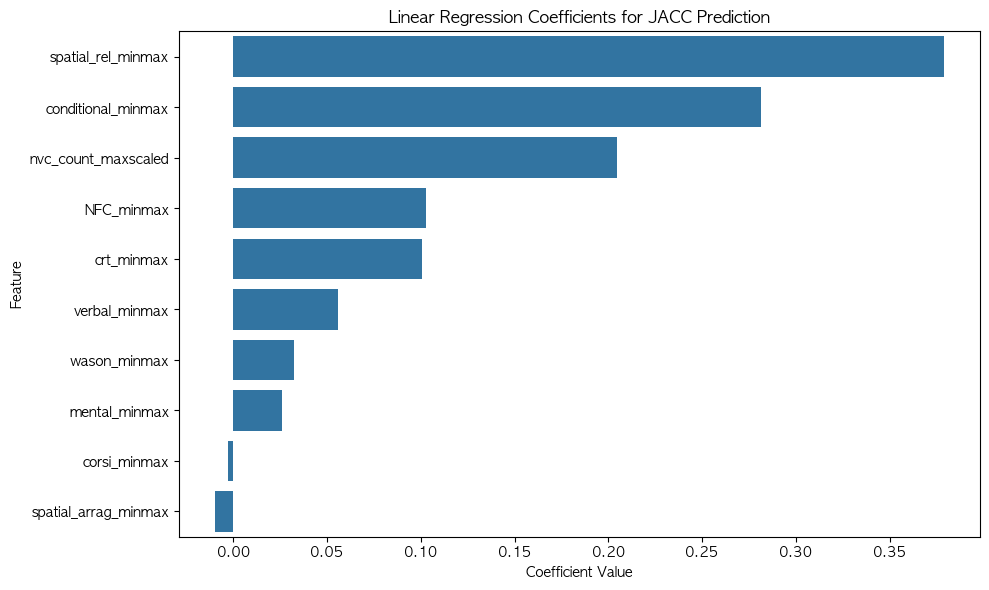

In [150]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# 최종 데이터 준비
# final_df는 각 id에 대해 정규화된 feature와 jacc를 포함한 데이터프레임이어야 함

# 종속 변수 (Target)
y = final_df["jacc"]

# 독립 변수 (Features)
X = final_df[[
    'conditional_minmax', 'mental_minmax', 
    'spatial_arrag_minmax', 'spatial_rel_minmax', 'nvc_count_maxscaled', 
    'crt_minmax', 'NFC_minmax','corsi_minmax', 'verbal_minmax', 'wason_minmax'
]]

# 선형 회귀 모델 적합
model = LinearRegression()
model.fit(X, y)

# 회귀 계수 출력
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("Regression coefficients :\n")
print(coefficients.round(3))

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.values, y=coefficients.index)
plt.title("Linear Regression Coefficients for JACC Prediction")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

📊 로지스틱 회귀 계수 (영향력 순):

spatial_rel_minmax      1.999
conditional_minmax      1.349
nvc_count_maxscaled     0.939
crt_minmax              0.903
mental_minmax           0.868
spatial_arrag_minmax    0.553
verbal_minmax           0.486
corsi_minmax            0.318
wason_minmax            0.292
NFC_minmax             -0.026
dtype: float64


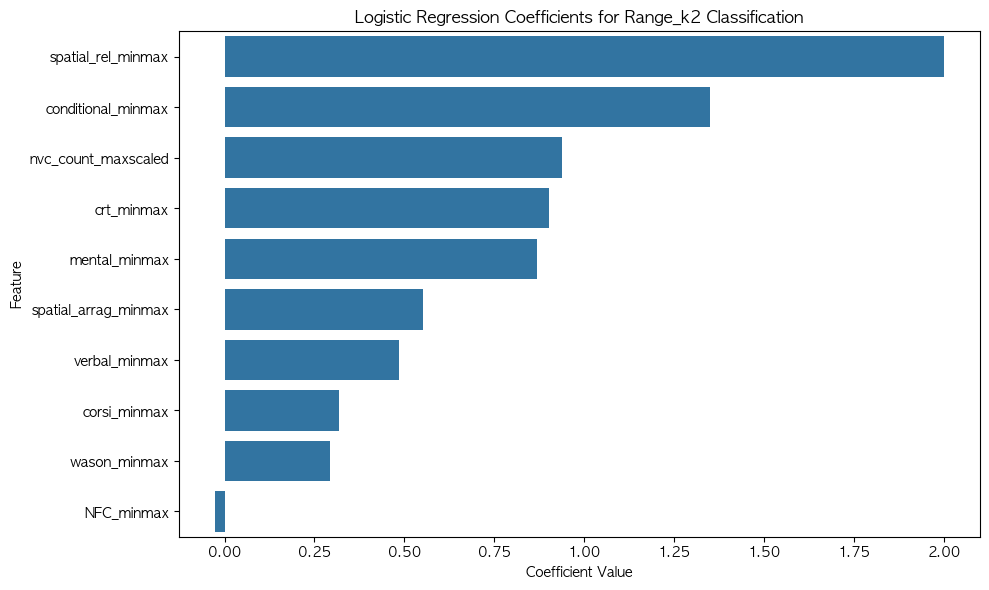

In [151]:
from sklearn.linear_model import LogisticRegression

# 종속 변수: 이진값
y = final_df["Range_k2"]  # jacc가 아닌 0/1 이진 클래스여야 합니다

# 독립 변수는 그대로 사용 가능
X = final_df[[
    'conditional_minmax', 'mental_minmax', 
    'spatial_arrag_minmax', 'spatial_rel_minmax', 'nvc_count_maxscaled', 
    'crt_minmax', 'NFC_minmax','corsi_minmax', 'verbal_minmax', 'wason_minmax'
]]

# 로지스틱 회귀 모델
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# 계수 확인
coefficients = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print("📊 로지스틱 회귀 계수 (영향력 순):\n")
print(coefficients.round(3))

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.values, y=coefficients.index)
plt.title("Logistic Regression Coefficients for Range_k2 Classification")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Coefficients with p-values:
                      coef  p-value
const               -0.154   0.0125
conditional_minmax   0.286   0.0042
spatial_rel_minmax   0.406   0.0000
nvc_count_maxscaled  0.192   0.0531
crt_minmax           0.128   0.0221


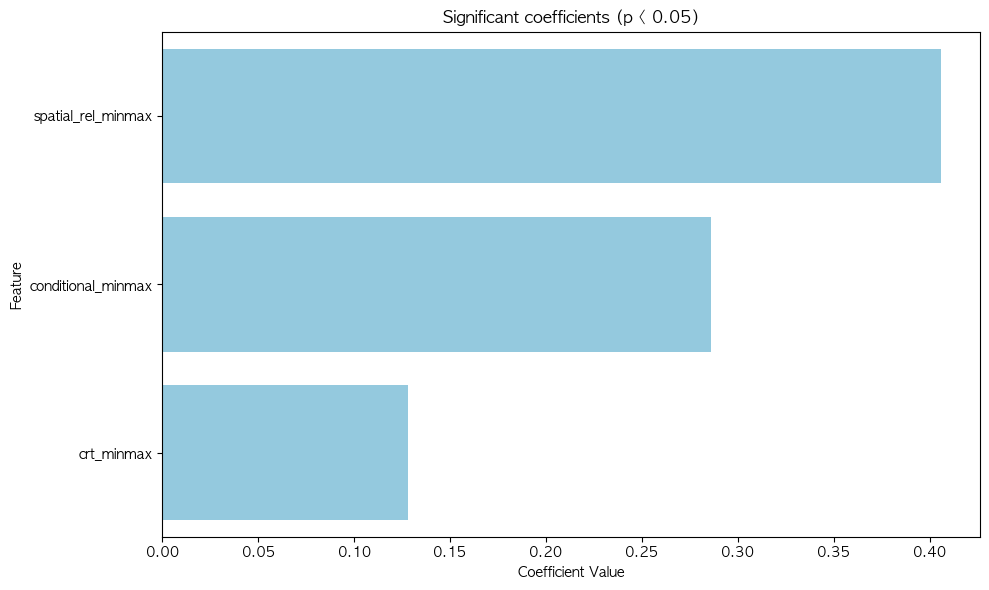

In [152]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 종속 변수
y = final_df["jacc"]

# 독립 변수 후보
features = [
    'conditional_minmax', 'mental_minmax', 
    'spatial_arrag_minmax', 'spatial_rel_minmax', 'nvc_count_maxscaled', 
    'crt_minmax', 'NFC_minmax','corsi_minmax', 'verbal_minmax', 'wason_minmax'
]

# AIC가 가장 낮은 조합을 찾기
best_aic = np.inf
best_combo = None
best_model = None

for k in range(1, len(features) + 1):
    for combo in combinations(features, k):
        X_subset = sm.add_constant(final_df[list(combo)])
        model = sm.OLS(y, X_subset).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_combo = combo
            best_model = model

# p값 추가하기!

# 결과 출력
print("Coefficients with p-values:")
summary_df = pd.DataFrame({
    "coef": best_model.params.round(3),
    "p-value": best_model.pvalues.round(4)
})
print(summary_df)

# 유의한 변수만 시각화 (p < 0.05 기준)
sig_summary = summary_df.drop("const").query("`p-value` < 0.05")
sig_coefficients = sig_summary["coef"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sig_coefficients.values, y=sig_coefficients.index, color='skyblue')
plt.title("Significant coefficients (p < 0.05)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

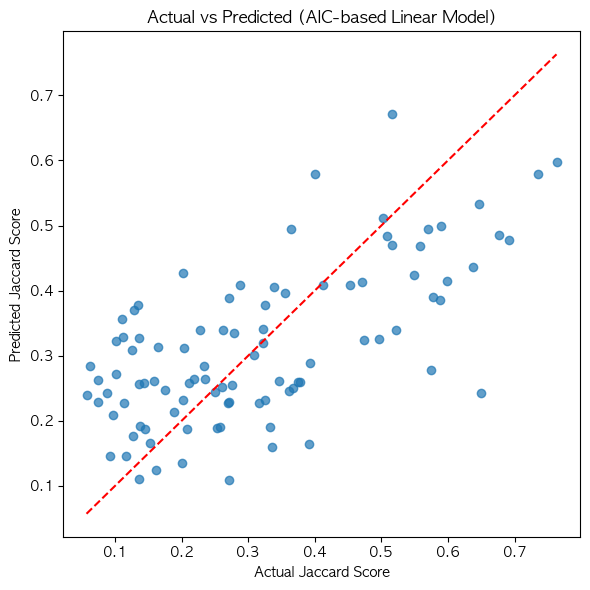

In [153]:
import matplotlib.pyplot as plt

y_pred = best_model.predict(sm.add_constant(final_df[list(best_combo)]))

plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 대각선 (예측=실제)
plt.xlabel("Actual Jaccard Score")
plt.ylabel("Predicted Jaccard Score")
plt.title("Actual vs Predicted (AIC-based Linear Model)")
plt.tight_layout()
plt.show()

In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 데이터: df는 사전에 불러와 있어야 함
X = final_df[[
    'conditional_minmax', 'mental_minmax', 
    'spatial_arrag_minmax', 'spatial_rel_minmax', 'nvc_count_maxscaled', 
    'crt_minmax', 'NFC_minmax','corsi_minmax', 'verbal_minmax', 'wason_minmax'
]].values
y = final_df["jacc"].values

loo = LeaveOneOut()
errors = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)[0]
    errors.append(abs(pred - y_test[0]))

all_input_mae = np.mean(errors)
print("LOOCV MAE using all features:", round(all_input_mae, 4))

LOOCV MAE using all features: 0.127


In [155]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# AIC 기준으로 선택된 feature 조합 (앞선 코드 실행 후 best_combo에 저장됨)
selected_features = list(best_combo)

# 입력값과 타겟 정의
X = final_df[selected_features].values
y = final_df["jacc"].values

# LOOCV 설정
loo = LeaveOneOut()
errors = []

# LOOCV 반복
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    errors.append(abs(y_pred[0] - y_test[0]))

# 최종 MAE 계산
loocv_mae = np.mean(errors)
print(f"LOOCV MAE (AIC-selected features): {loocv_mae:.4f}")

LOOCV MAE (AIC-selected features): 0.1185


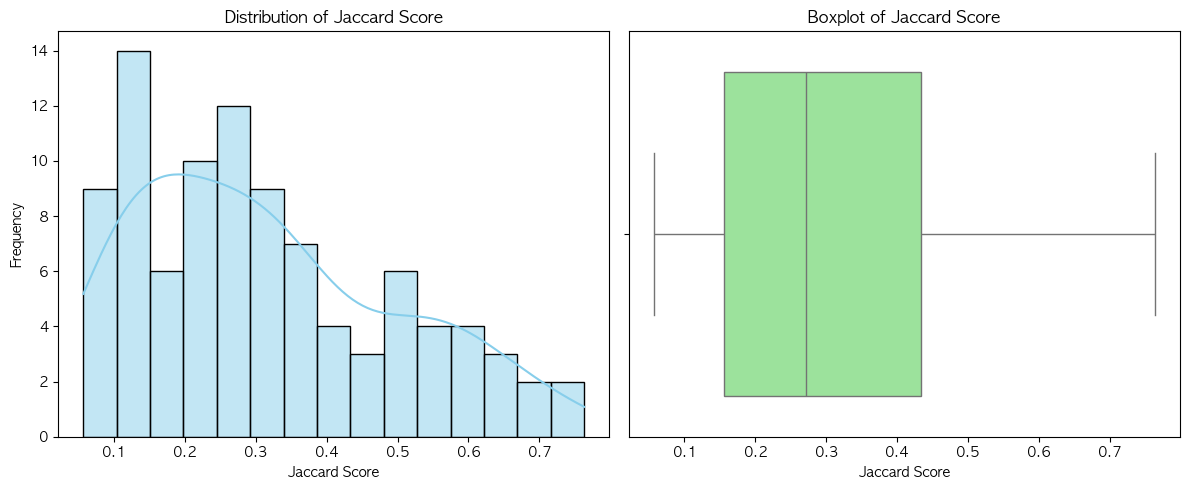

In [156]:
target_col = 'jacc'

plt.figure(figsize=(12, 5))

# 1. 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(final_df[target_col], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Jaccard Score')
plt.xlabel('Jaccard Score')
plt.ylabel('Frequency')

# 2. 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=final_df[target_col], color='lightgreen')
plt.title('Boxplot of Jaccard Score')
plt.xlabel('Jaccard Score')

plt.tight_layout()
plt.show()

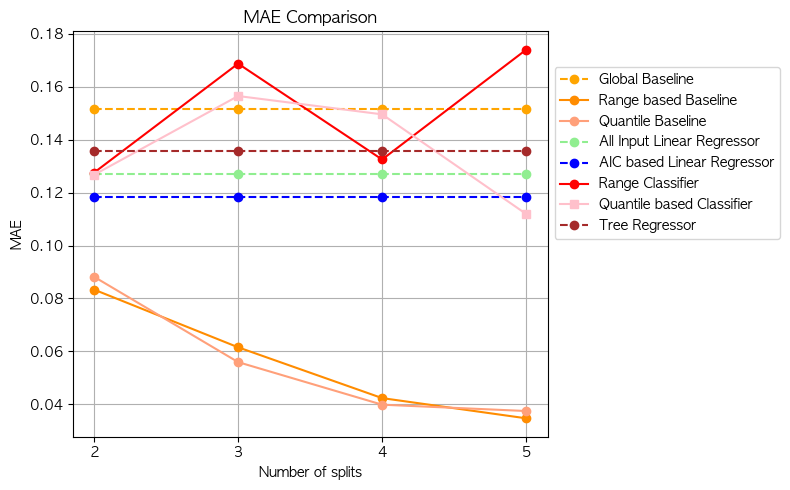

In [208]:
feature_cols = [
    'conditional_minmax', 'mental_minmax', 
    'spatial_arrag_minmax', 'spatial_rel_minmax', 'nvc_count_maxscaled', 
    'crt_minmax', 'NFC_minmax','corsi_minmax', 'verbal_minmax', 'wason_minmax'
]

# jaccard score clustering

def run_loocv_with_jacc_cluster_target(final_df, cluster_col="Range_k2", jacc_col="jacc", max_depth=2):
    errors = []
    X_full = final_df[feature_cols]
    y_clusters = final_df[cluster_col].values
    y_jacc = final_df[jacc_col].values
    loo = LeaveOneOut()

    for train_idx, test_idx in loo.split(X_full):
        X_train, X_test = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_train_clusters = y_clusters[train_idx]
        y_train_jacc = y_jacc[train_idx]
        true_jacc = y_jacc[test_idx[0]]

        
        tree = DecisionTreeClassifier(max_depth=max_depth, random_state=2)
        tree.fit(X_train, y_train_clusters)

        pred_cluster = tree.predict(X_test)[0]
        cluster_jaccs = y_train_jacc[y_train_clusters == pred_cluster] #

        if len(cluster_jaccs) == 0:
            continue  

        pred_jacc = cluster_jaccs.mean()
        errors.append(abs(pred_jacc - true_jacc))

    return np.mean(errors)


def run_loocv_regressor(final_df, jacc_col="jacc", max_depth=2):
    errors = []
    X_full = final_df[feature_cols]
    y_jacc = final_df[jacc_col].values
    loo = LeaveOneOut()

    for train_idx, test_idx in loo.split(X_full):
        X_train, X_test = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_train_jacc = y_jacc[train_idx]
        true_jacc = y_jacc[test_idx[0]]

        
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=2)
        tree.fit(X_train, y_train_jacc)

        pred_score = tree.predict(X_test)[0]
    
        errors.append(abs(pred_score - true_jacc))

    return np.mean(errors)



k_list = [2, 3, 4, 5]
depth_list = [2, 3, 4, 5]

cluster_range_mae = {
    k: run_loocv_with_jacc_cluster_target(final_df,
                                         cluster_col =f"Range_k{k}",
                                         jacc_col = "jacc",
                                         max_depth = 2
                                         )
    for k in k_list
}

mae_tree ={
    depth: [
        run_loocv_with_jacc_cluster_target(
        final_df,
        cluster_col = f"Range_k{k}",
        max_depth = depth
        )
        for k in k_list
    ]
    for depth in depth_list
} 


mae_regressor = {
    depth: run_loocv_regressor(
        final_df,
        jacc_col="jacc",
        max_depth=depth
    )
    for depth in depth_list
}


mae_jacc_tree = {
    depth: [
        run_loocv_with_jacc_cluster_target(
            final_df,
            cluster_col=f"Cluster_jacc_{k}",
            jacc_col="jacc",
            max_depth=depth
        )
        for k in k_list
    ]
    for depth in depth_list
}


cluster_jaccard_mae = {
    k: run_loocv_with_jacc_cluster_target(final_df,
                                         cluster_col =f"Cluster_jacc_{k}",
                                         jacc_col = "jacc",
                                         max_depth = 2
                                         )
    for k in k_list
}

#baseline mae 값들 
baseline = overall_loocv_mae
mae_cluster_list = [cluster_range_mae_2, cluster_range_mae_3,cluster_range_mae_4,cluster_range_mae_5]
mae_Quantile_list = [cluster_jaccard_mae_2, cluster_jaccard_mae_3, cluster_jaccard_mae_4, cluster_jaccard_mae_5]

# range group
mae_tree_d2 = mae_tree[2]
mae_tree_d3 = mae_tree[3]
mae_tree_d4 = mae_tree[4]
mae_tree_d5 = mae_tree[5]

# quantile 그룹 
mae_jacc_d2 = mae_jacc_tree[2]
mae_jacc_d3 = mae_jacc_tree[3]
mae_jacc_d4 = mae_jacc_tree[4]
mae_jacc_d5 = mae_jacc_tree[5]

# tree regressor
mae_reg_d2 = [mae_regressor[2]] * len(k_list)
mae_reg_d3 = [mae_regressor[3]] * len(k_list)
mae_reg_d4 = [mae_regressor[4]] * len(k_list)
mae_reg_d5 = [mae_regressor[5]] * len(k_list)


cluster_counts = [2, 3, 4, 5]
plt.figure(figsize=(8, 5))

plt.plot(cluster_counts, [baseline]*4,
         linestyle="--", color='orange', marker='o',
         label="Global Baseline")
plt.plot(cluster_counts, 
         mae_cluster_list, 
         label="Range based Baseline", color='darkorange', 
         marker='o')
plt.plot(cluster_counts, 
         mae_Quantile_list, 
         label="Quantile Baseline", color='lightsalmon', marker ='o') 


# AIC selection 
plt.plot(cluster_counts,[all_input_mae]*4,
         linestyle="--", color='lightgreen', marker='o',
         label="All Input Linear Regressor")


# AIC selection 
plt.plot(cluster_counts,[loocv_mae]*4,
         linestyle="--", color='blue', marker='o',
         label="AIC based Linear Regressor")
plt.plot(cluster_counts, 
         mae_tree_d2, 
         label="Range Classifier", 
         color='red', 
         marker='o')
plt.plot(cluster_counts,
         mae_jacc_d2,
         label="Quantile based Classifier",
         color='pink', marker='s')
plt.plot(cluster_counts,
         mae_reg_d2,
         label="Tree Regressor",
         linestyle="--", marker='o', color='brown')

'''

plt.plot(cluster_counts, 
         mae_tree_d2, 
         label="Range Classifier Depth = 2", 
         color='red', 
         marker='o')

plt.plot(cluster_counts, 
         mae_tree_d3, 
         label="Classifier Depth = 3", 
         color='blue', marker='o')
plt.plot(cluster_counts, 
         mae_tree_d4, 
         label="Classifier Depth = 4", 
         color='green', marker='o')
plt.plot(cluster_counts, 
         mae_tree_d5, 
         label="Classifier Depth = 5", 
         color='navy', marker='o')


# Jaccard Quantile 

plt.plot(cluster_counts,
         mae_jacc_d2,
         label="Quantile based Classifier Depth = 2",
         color='pink', marker='s')



plt.plot(cluster_counts,
         mae_jacc_d3,
         label="Classifier Depth = 3",
         color='teal', marker='s')
plt.plot(cluster_counts,
         mae_jacc_d4,
         label="Classifier Depth = 4",
         color='magenta', marker='s')
plt.plot(cluster_counts,
         mae_jacc_d5,
         label="Classifier Depth = 5",
         color='cyan', marker='s')



#Regressor 
plt.plot(cluster_counts,
         mae_reg_d2,
         label="Regressor Depth = 2",
         linestyle=":", color='black')

plt.plot(cluster_counts,
         mae_reg_d3,
         label="Regressor Depth = 3",
         linestyle=":", color='gray')
plt.plot(cluster_counts,
         mae_reg_d4,
         label="Regressor Depth = 4",
         linestyle=":", color='black')
plt.plot(cluster_counts,
         mae_reg_d5,
         label="Regressor Depth = 5",
         linestyle=":", color='olive')

'''


plt.xlabel("Number of splits")
plt.ylabel("MAE")
plt.title("MAE Comparison")
plt.xticks(cluster_counts)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.show()